In [1]:
import torch
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from torchvision import datasets 
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, Subset
from torch import nn
from torch import optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import sys
import STRDataset as dataset
import os
import time
from scipy.stats import pearsonr
from Baseline_CNN import CNN
import Baseline_w_batchnorm
from Dilated_CNN import Dialated_CNN

In [2]:
def get_corr_lists(model, dataloader):
    predictions = []
    labels = []
    motif_lengths = []
    with torch.no_grad():
        model.eval()
        for (Y,y,m) in dataloader:
            Y = Y.to(device)
            y = y.to(device)
            m = m.to(device)
            Y = torch.transpose(Y,1,2)
            Y = Y.float()
            y = y.float()
            y = torch.reshape(y, (y.size(dim=0),1))
            m = m.float()
            
            prediction = model(Y,m)
            predictions.extend(prediction.flatten().numpy())
            labels.extend(y.flatten().numpy())
            motif_lengths.extend(m[:, 77].flatten().numpy())

        predictions_mul = np.multiply(predictions, motif_lengths)
        labels_mul = np.multiply(labels, motif_lengths)

    return predictions, labels, predictions_mul, labels_mul

In [3]:
ohe_dir = "/nfs/turbo/dcmb-class/bioinf593/groups/group_05/STRonvoli/data/ohe/"
meta_file = "/nfs/turbo/dcmb-class/bioinf593/groups/group_05/STRonvoli/data/metadata.tsv"

In [4]:
dataset = dataset.STRDataset(ohe_dir, meta_file) 
meta = pd.read_csv(meta_file, sep = '\t')
test_indices = meta.index[meta["split"] == 1]
validset = Subset(dataset, test_indices)
validloader = DataLoader(validset, batch_size = 64, shuffle=False)

In [5]:
pos_count = 500
meta_count = 79

## Baseline CNN (no batchnorm)

In [ ]:
model = CNN(meta_count).to(device)

base_cnn_checkpoint = torch.load('/nfs/turbo/dcmb-class/bioinf593/groups/group_05/STRonvoli/models/epoch-9-model.pth')
model.load_state_dict(base_cnn_checkpoint['model_state_dict'])

In [ ]:
base_cnn_predictions, labels = get_corr_lists(model, validloader)

In [7]:
np.corrcoef(predictions, labels)

/home/rintsen/.conda/envs/regembed/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/rintsen/.conda/envs/regembed/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[nan, nan],
       [nan,  1.]])

Text(0, 0.5, 'Model STR count predictions')

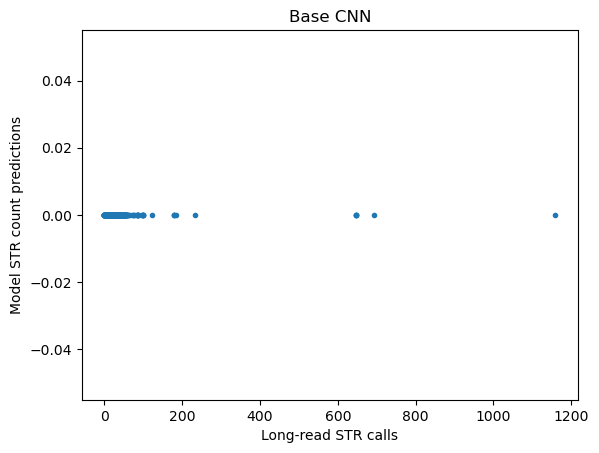

In [8]:
plt.scatter(labels, predictions, marker='.')
plt.title('Base CNN')
plt.xlabel('Long-read STR calls')
plt.ylabel('Model STR count predictions')

## Baseline CNN w/ batchnorm

In [6]:
model = Baseline_w_batchnorm.CNN(meta_count).to(device)

batchnorm_cnn_checkpoint = torch.load('/nfs/turbo/dcmb-class/bioinf593/groups/group_05/STRonvoli/models/batchnorm/epoch-7-model.pth')
model.load_state_dict(batchnorm_cnn_checkpoint['model_state_dict'])

<All keys matched successfully>

In [7]:
bnorm_cnn_predictions, labels, bnorm_cnn_predictions_mul, labels_mul = get_corr_lists(model, validloader)

In [8]:
np.corrcoef(bnorm_cnn_predictions, labels)

array([[1.        , 0.80622767],
       [0.80622767, 1.        ]])

Text(0, 0.5, 'Model STR count predictions')

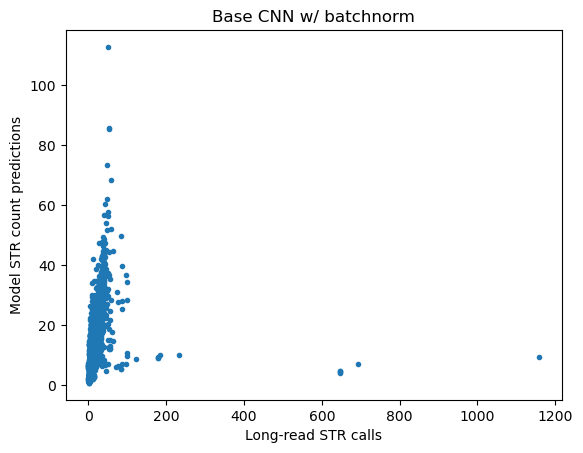

In [16]:
plt.scatter(labels, bnorm_cnn_predictions, marker='.')
plt.title('Base CNN w/ batchnorm')
plt.xlabel('Long-read STR calls')
plt.ylabel('Model STR count predictions')
# plt.xlim(0, 120)

In [10]:
np.corrcoef(bnorm_cnn_predictions_mul, labels_mul)

array([[1.        , 0.58398887],
       [0.58398887, 1.        ]])

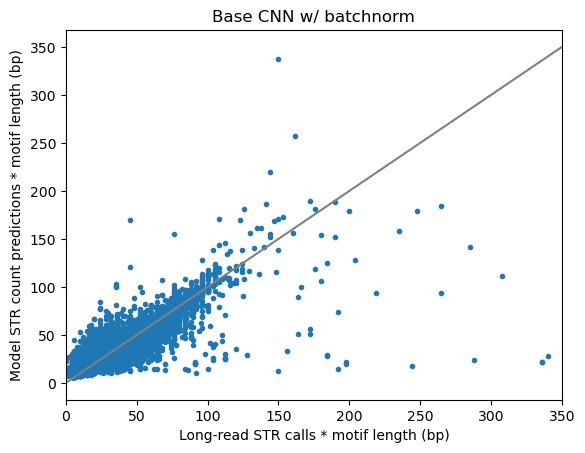

In [13]:
plt.scatter(labels_mul, bnorm_cnn_predictions_mul, marker='.')
plt.title('Base CNN w/ batchnorm')
plt.xlabel('Long-read STR calls * motif length (bp)')
plt.ylabel('Model STR count predictions * motif length (bp)')
plt.xlim(0, 350)
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='grey')

## Dilated CNN

In [12]:
dilated_model = Dialated_CNN(meta_count).to(device)

dilated_cnn_checkpoint = torch.load('/nfs/turbo/dcmb-class/bioinf593/groups/group_05/STRonvoli/models/dilation/epoch-9-model-dilated.pth', map_location=torch.device('cpu'))
dilated_model.load_state_dict(dilated_cnn_checkpoint['model_state_dict'])

RuntimeError: Error(s) in loading state_dict for Dialated_CNN:
	size mismatch for fc1.weight: copying a param with shape torch.Size([256, 9199]) from checkpoint, the shape in current model is torch.Size([256, 8239]).

In [8]:
dil_cnn_predictions, dil_labels, dil_cnn_predictions_mul, dil_labels_mul = get_corr_lists(dilated_model, validloader)

In [10]:
dil_cnn_predictions

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [9]:
np.corrcoef(dil_cnn_predictions, dil_labels)

/home/rintsen/.conda/envs/regembed/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/rintsen/.conda/envs/regembed/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[nan, nan],
       [nan,  1.]])